In [7]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('/content/abalone.csv')

UNIVARIANT

In [9]:
l=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


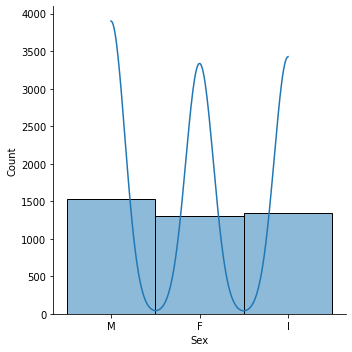

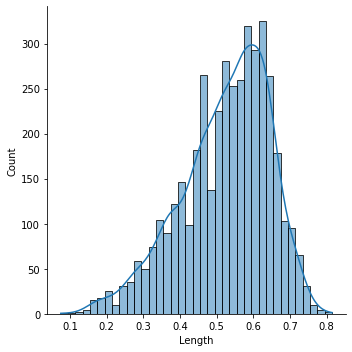

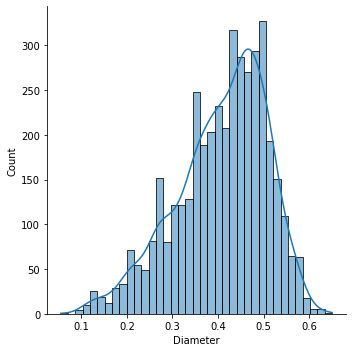

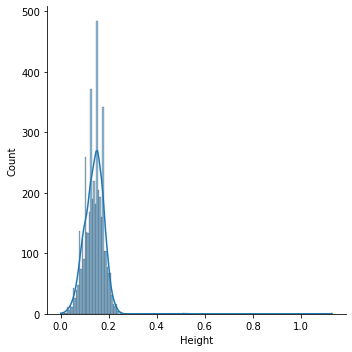

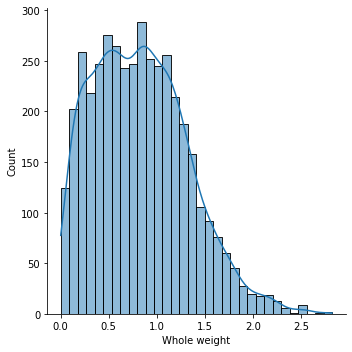

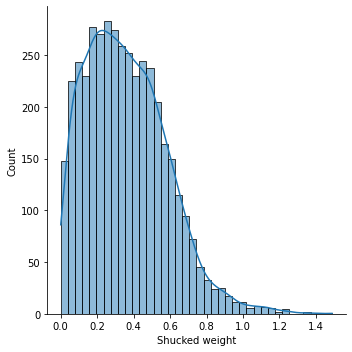

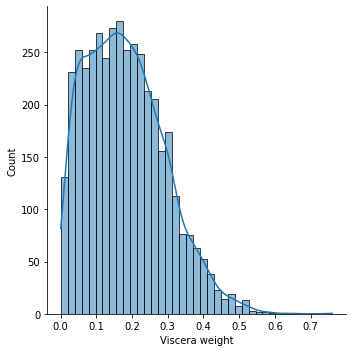

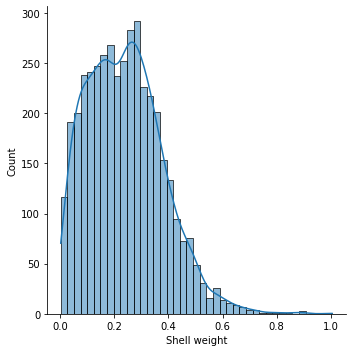

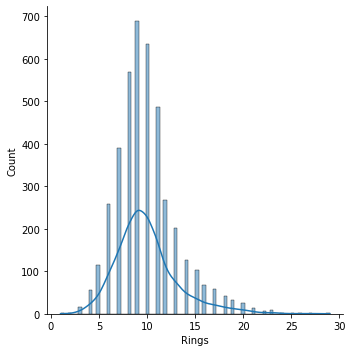

In [10]:
l=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']

for i in l:
    sns.displot(data=data[i],kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


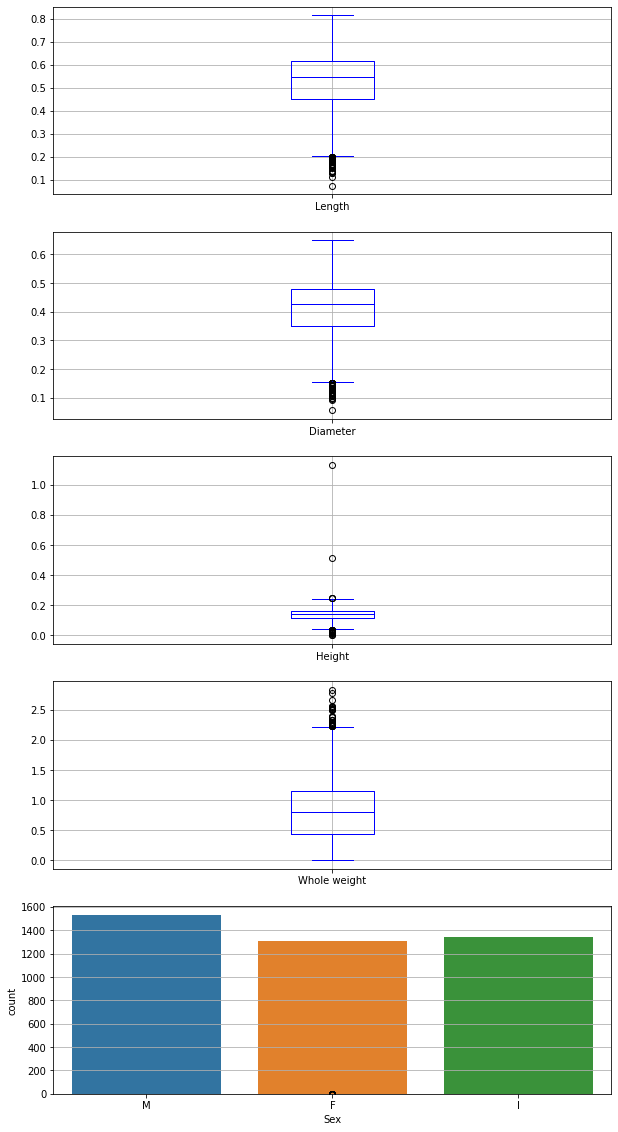

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


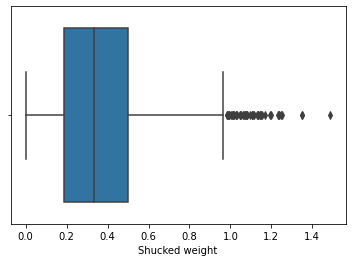

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


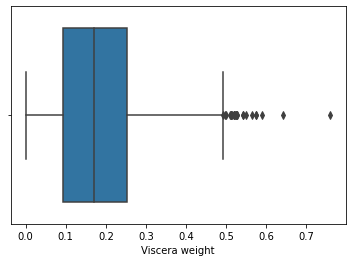

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


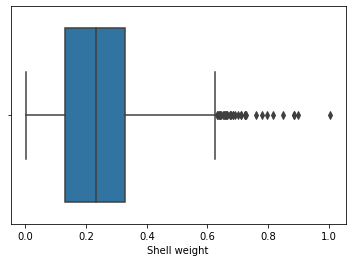

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


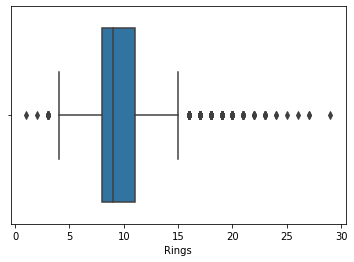

<Figure size 432x288 with 0 Axes>

In [11]:
l=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, figsize=(10,20))
data.boxplot(column=[l[1]],grid='False',color='blue',ax = ax1)
data.boxplot(column=[l[2]],grid='False',color='blue',ax = ax2)
data.boxplot(column=[l[3]],grid='False',color='blue',ax = ax3)
data.boxplot(column=[l[4]],grid='False',color='blue',ax = ax4)
data.boxplot(column=[l[5]],grid='False',color='blue',ax = ax5)
sns.countplot(data["Sex"])
plt.show()
sns.boxplot(data["Shucked weight"])
plt.show()
sns.boxplot(data["Viscera weight"])
plt.show()
sns.boxplot(data["Shell weight"])
plt.show()
sns.boxplot(data["Rings"])
plt.show()
plt.tight_layout()

BIVARIANT

In [12]:
data[['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']].corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

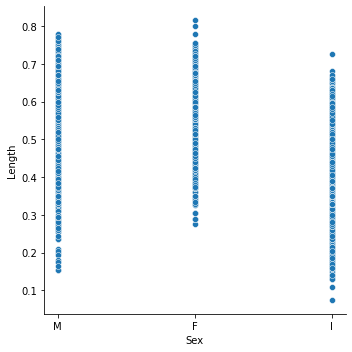

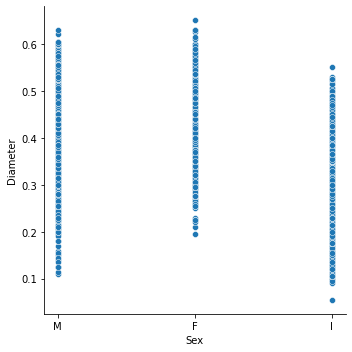

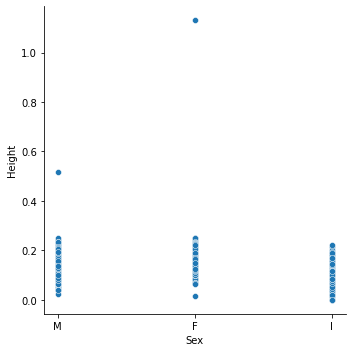

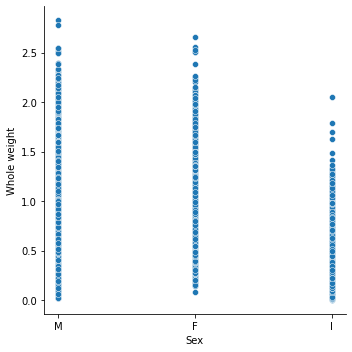

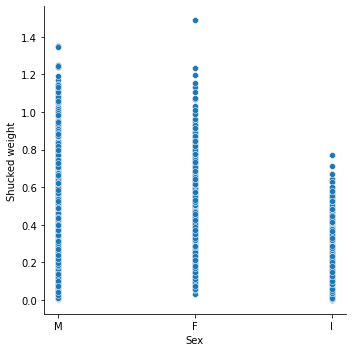

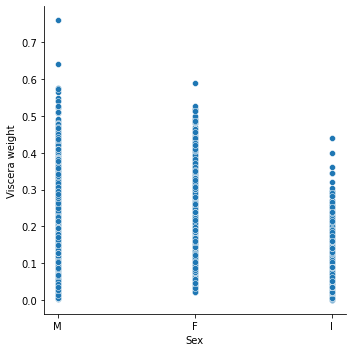

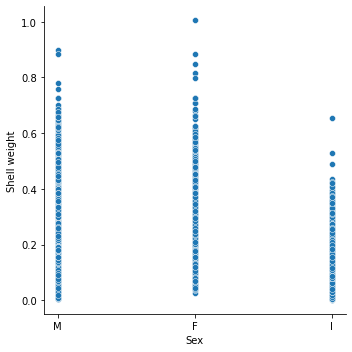

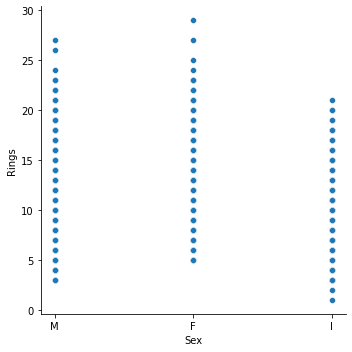

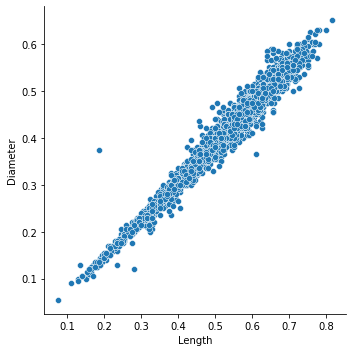

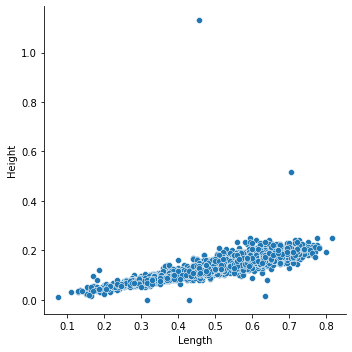

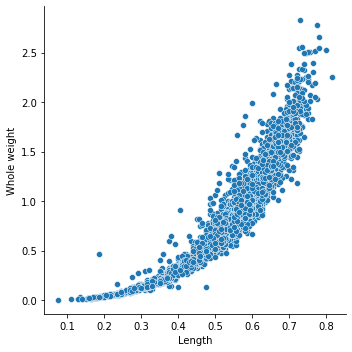

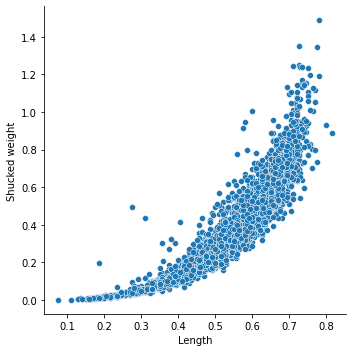

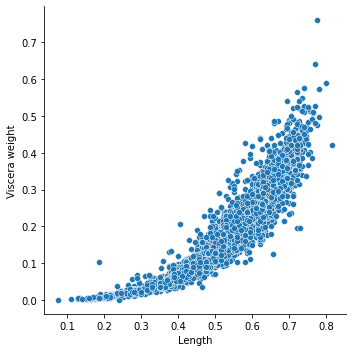

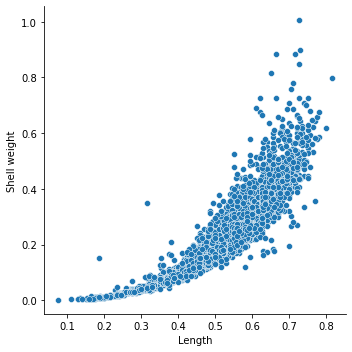

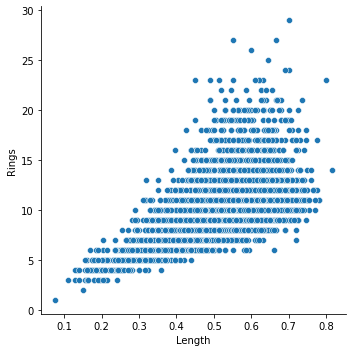

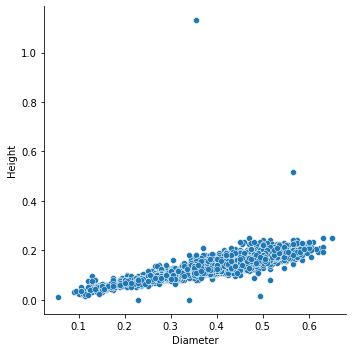

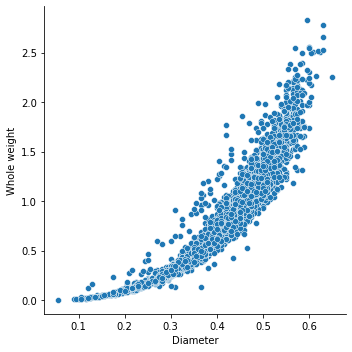

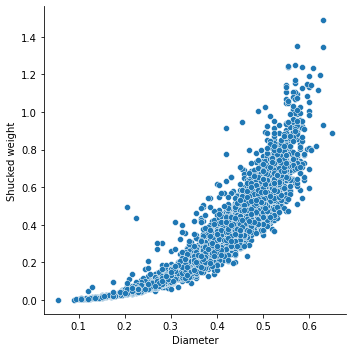

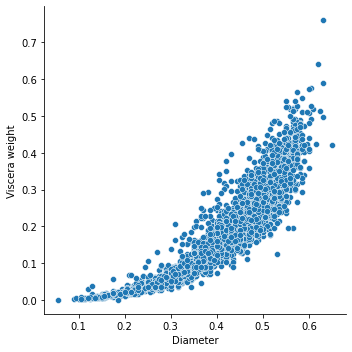

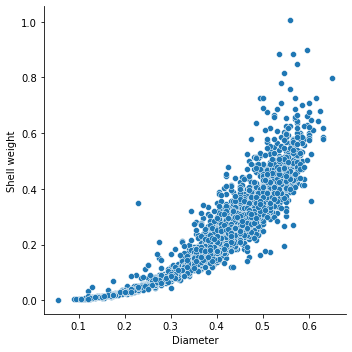

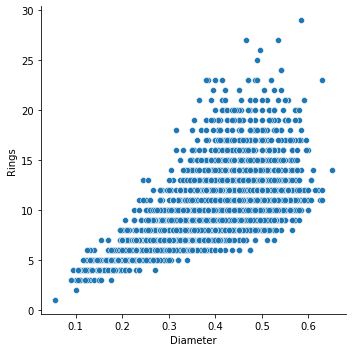

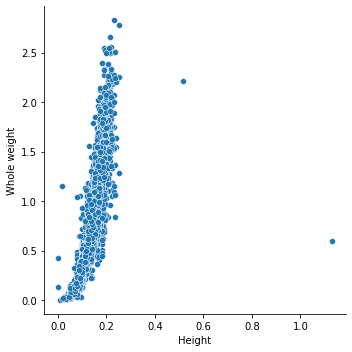

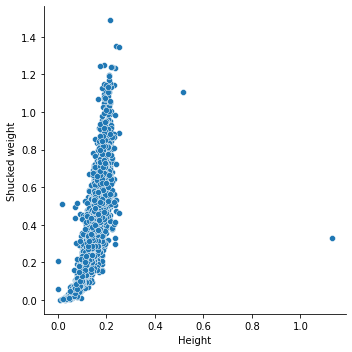

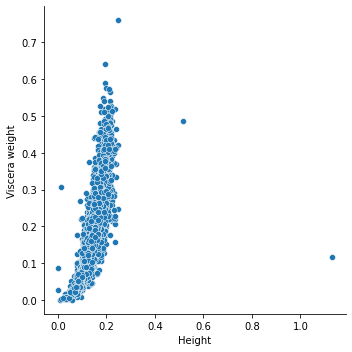

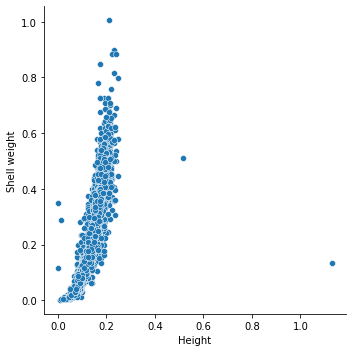

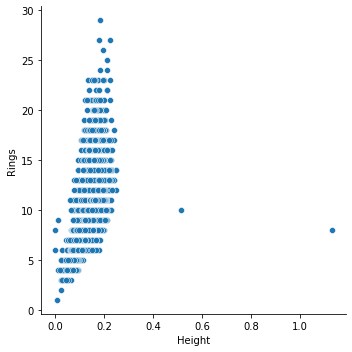

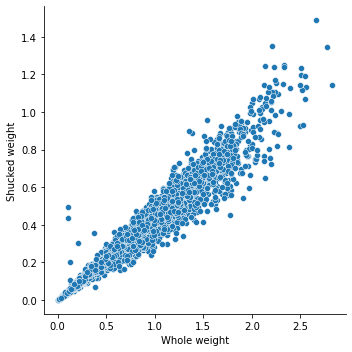

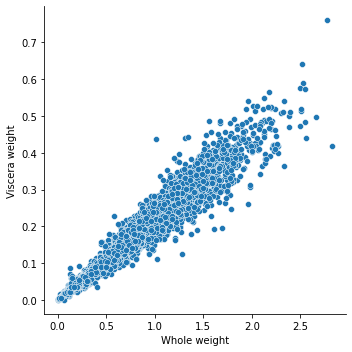

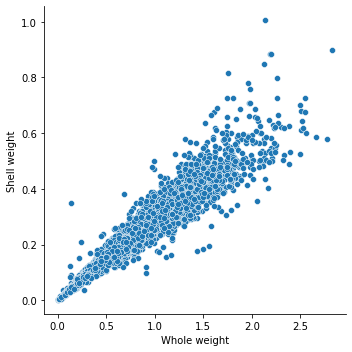

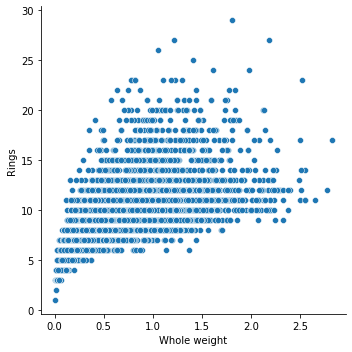

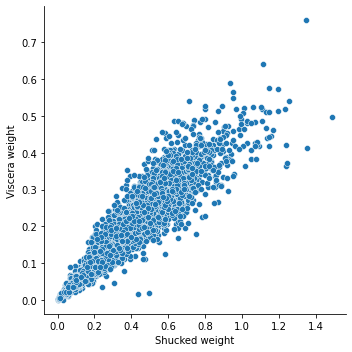

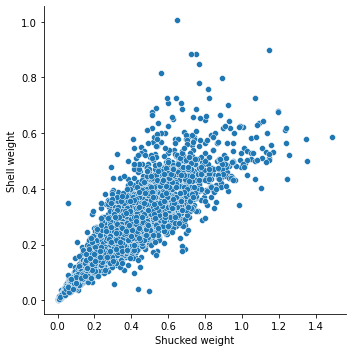

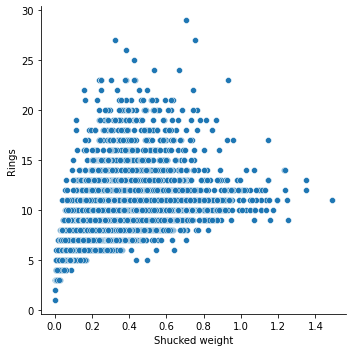

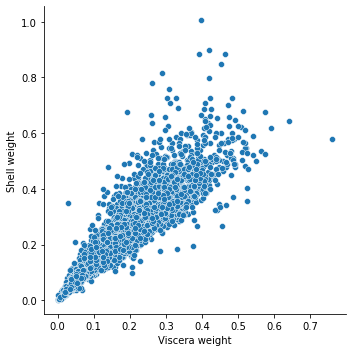

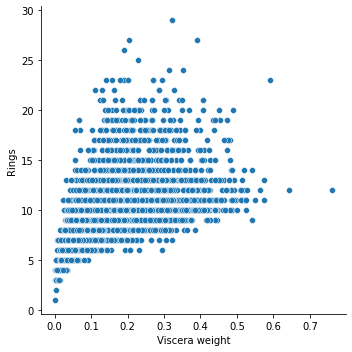

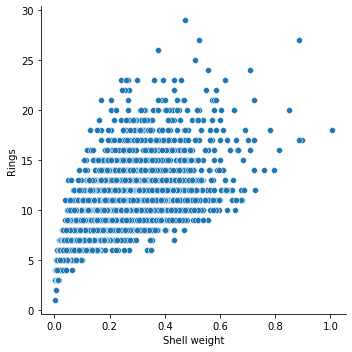

In [13]:
l=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
for i in range(len(l)-1):
    for j in range(i+1,len(l)):
        sns.relplot(x = l[i],y = l[j],data = data)

MULTIVARIANT

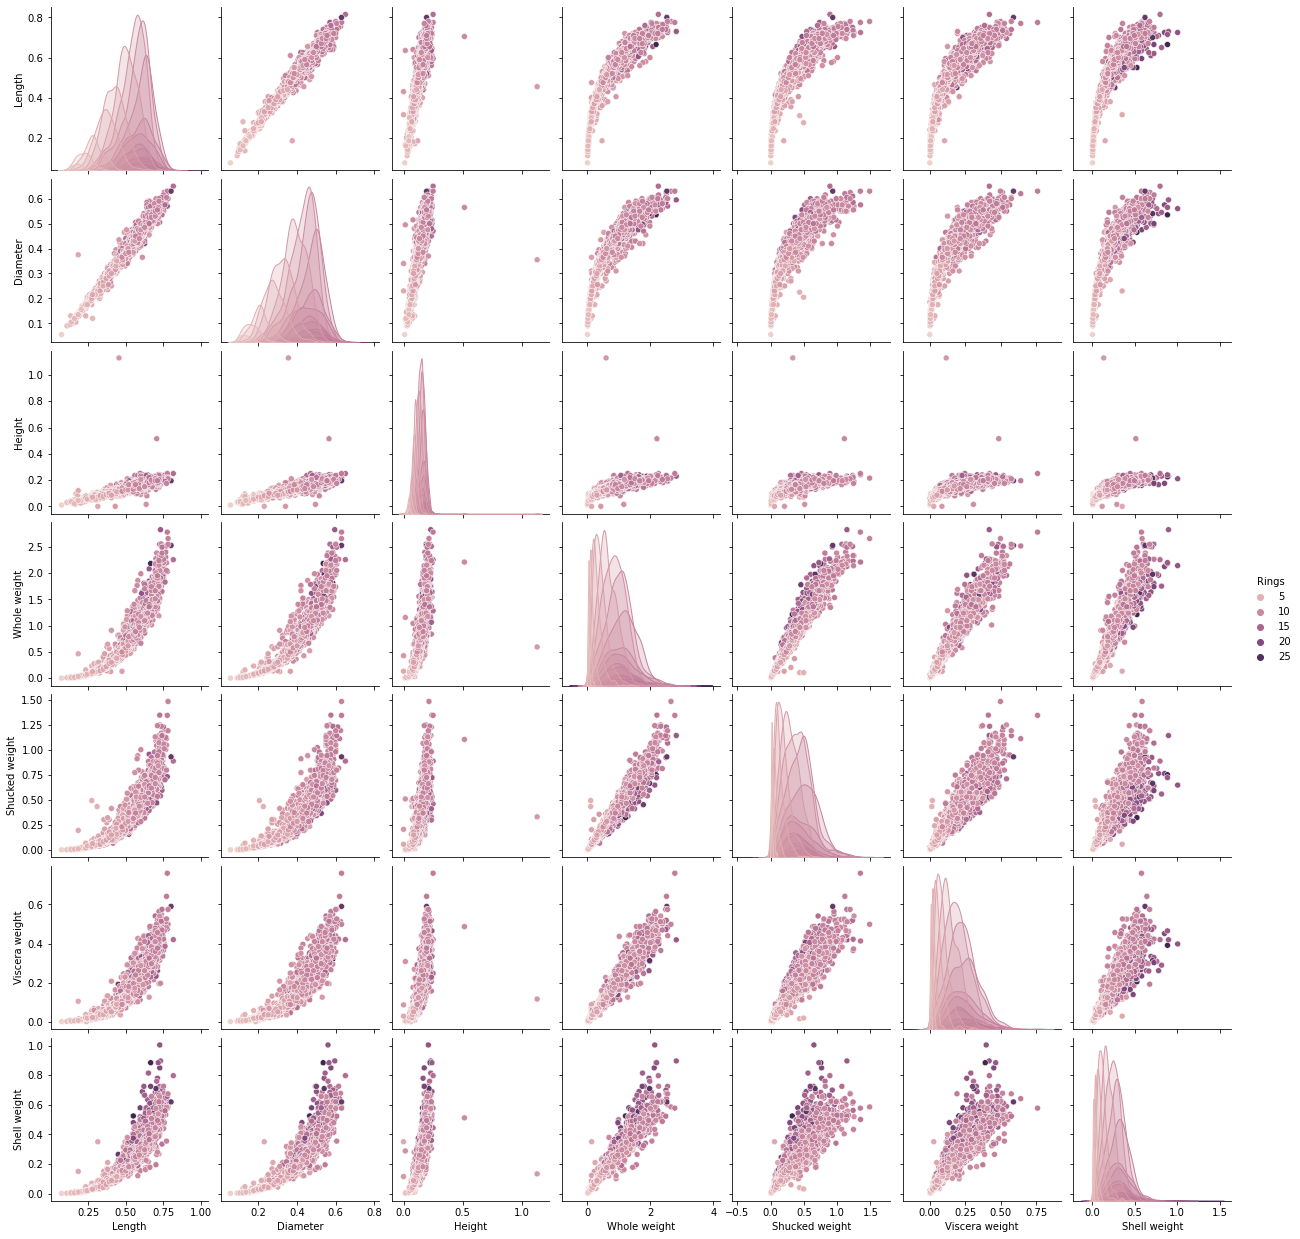

In [14]:

sns.pairplot(data=data[['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']],hue='Rings')

DATASET ANALYSIS

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [16]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [17]:
data.shape

(4177, 9)

In [18]:
data.isnull().values.any()

False

In [19]:
data['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

In [20]:
data["Whole weight"].unique()

array([0.514 , 0.2255, 0.677 , ..., 1.176 , 1.0945, 1.9485])

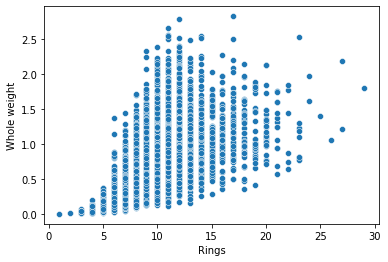

In [21]:
sns.scatterplot(x='Rings', y='Whole weight', data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 86.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 91.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 88.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 90.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 90.0% of the points cannot be placed; y

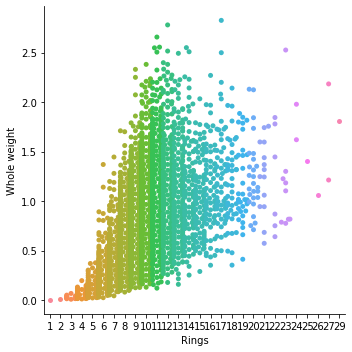

In [22]:
sns.catplot(x='Rings', y='Whole weight',kind='swarm', data=data)

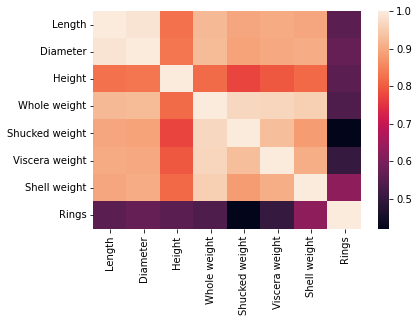

In [23]:
sns.heatmap(data.corr())

OUTLIERS

In [24]:
def find_outliers_Rings(data):
   q1=data.quantile(0.25)
   q3=data.quantile(0.75)
   Rings=q3-q1
   outliers = data[((data<(q1-1.5*Rings)) | (data>(q3+1.5*Rings)))]
   return outliers
outliers = find_outliers_Rings(data['Rings'])
print("Total outliers be : ", len(outliers))
print("Maximum outliers : ", outliers.max())
print("Minimum outliers : ", outliers.min())

Total outliers be :  278
Maximum outliers :  29
Minimum outliers :  1


In [25]:
import scipy.stats as stats
np.random.seed(10)
data = pd.DataFrame(np.random.randint(0, 10, size=(100, 3)), columns=['A', 'B', 'C'])
data[:10]

,A,B,C
0,9,4,0
1,1,9,0
2,1,8,9
3,0,8,6
4,4,3,0
5,4,6,8
6,1,8,4
7,1,3,6
8,5,3,9
9,6,9,1


CATEGORIAL COLUMN

In [26]:
cat = pd.Categorical(['a', 'b', 'c'])
cat.dtype.name

'category'

In [27]:
def is_categorical(array_like):
    return array_like.dtype.name == 'category'

ENCODING

In [28]:
from sklearn.preprocessing import OneHotEncoder
Ring_values = (15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24)
Ring_df = pd.DataFrame(Ring_values, columns=['Ring_values'])
labelencoder = LabelEncoder()
Ring_df['Ring_Values_Cat'] = labelencoder.fit_transform(Ring_df['Ring_values'])
Ring_df

,Ring_values,Ring_Values_Cat
0,15,14
1,7,6
2,9,8
3,10,9
4,8,7
5,20,19
6,16,15
7,19,18
8,14,13
9,11,10


In [29]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(Ring_df[['Ring_Values_Cat']]).toarray())
bridge_df = Ring_df.join(enc_df)
bridge_df

,Ring_values,Ring_Values_Cat,0,1,2,3,4,5,6,7,...,18,19,20,21,22,23,24,25,26,27
0,15,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,20,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,16,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,19,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,14,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,11,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
Ring_arr=Ring_df.to_numpy()
print(Ring_arr)

[[15 14]
 [ 7  6]
 [ 9  8]
 [10  9]
 [ 8  7]
 [20 19]
 [16 15]
 [19 18]
 [14 13]
 [11 10]
 [12 11]
 [18 17]
 [13 12]
 [ 5  4]
 [ 4  3]
 [ 6  5]
 [21 20]
 [17 16]
 [22 21]
 [ 1  0]
 [ 3  2]
 [26 25]
 [23 22]
 [29 27]
 [ 2  1]
 [27 26]
 [25 24]
 [24 23]]


In [45]:
data = pd.read_csv('/content/abalone.csv')
df = pd.get_dummies(data['Rings']).head()

In [46]:
x = df.iloc[:, 0:8].values
y = df.iloc[:, 8:9].values

In [37]:
from sklearn.preprocessing import MinMaxScaler
df_data = pd.DataFrame({
    "Rings": [15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24],
    "Whole weight": [0.514 , 0.2255, 0.677, 0.516, 0.205, 0.3515, 0.7775, 0.768, 0.5095, 0.8945, 0.6065, 0.406, 0.5415, 0.6845, 0.4755, 0.6645, 0.2905, 0.451, 0.2555, 0.381, 0.2455, 0.2255, 0.9395, 0.7635, 1.1615, 0.9285, 0.9955, 0.381]
})
scaler = MinMaxScaler()
df_data[["ScaledRings", "ScaledWeight"]] = scaler.fit_transform(
    df_data[["Rings", "Whole weight"]])

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [51]:
columns = ['Rings','Whole weight','Shucked weight','Viscera weight']
data = data.loc[:, columns]
data.head(10)

,Rings,Whole weight,Shucked weight,Viscera weight
0,15,0.5140,0.2245,0.1010
1,7,0.2255,0.0995,0.0485
2,9,0.6770,0.2565,0.1415
3,10,0.5160,0.2155,0.1140
4,7,0.2050,0.0895,0.0395
5,8,0.3515,0.1410,0.0775
6,20,0.7775,0.2370,0.1415
7,16,0.7680,0.2940,0.1495
8,9,0.5095,0.2165,0.1125
9,19,0.8945,0.3145,0.1510


In [52]:
features = ['Whole weight','Shucked weight','Viscera weight']
X = data.loc[:, features]
y = data.loc[:, ['Rings']]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [55]:
X_train.shape

(3132, 3)

In [56]:
X_test.shape

(1045, 3)

In [57]:
y_test.shape

(1045, 1)

In [58]:
y_train.shape

(3132, 1)

In [64]:
import numpy as np
train_y = np.ravel(y_train)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=40)
model.fit(X_train, train_y)

print(model.fit)

<bound method BaseForest.fit of RandomForestClassifier(random_state=40)>


In [69]:
predicted = model.predict(X_test)
model.score(X_test, y_test)

0.23349282296650717

In [70]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(X_test)

In [74]:
y_proba = model.predict_proba(X_test)

In [77]:
y_true = np.argmax(y_proba, axis=0)

In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

array([[ 0,  5,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  5,  6,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0, 10, 13, 10,  6,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  9, 14, 19, 11,  5,  1,  1,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  5, 18, 34, 34, 12,  7,  3,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  5, 25, 52, 35, 10,  6,  1,  1,  3,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  3,  9, 31, 38, 40, 19,  2,  5,  1,  1,  1,  1,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  2,  7, 11, 40, 42, 22,  6,  7,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  7,  9, 32, 28, 28,  6,  2,  2,  1,  3,  0,  0,
         0,  1,  0,  0,  1,  0,  0],
       [ 0,  0,  0,

In [90]:
from sklearn.metrics import precision_score
train_predictions = model.predict(X_train)
precision_score(train_y, train_predictions, average='weighted')

1.0

In [92]:
from sklearn.metrics import recall_score
recall_score(train_y, train_predictions, average='weighted')

1.0

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

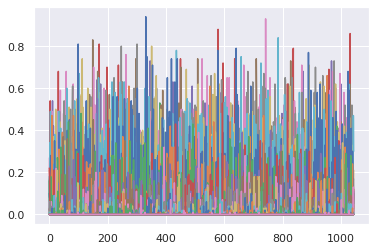

In [107]:
plt.plot(y_proba)